<a href="https://colab.research.google.com/github/wiktor1468/Iris_KNN_SVM_DTC/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris

**Workflow Stages:**
1. Data Loading and Initial Exploration:
* Distribution of classes in the target variable (Species).
* Summarize the statistics of numerical features.
* Check for missing data and duplicates.
2. Data Preprocessing:
* Normalize the numerical features using Min-Max scaling.
* Standardize the numerical features using Z-score normalization.
3. Data Visualization:
* Relationship between Sepal Width and Sepal Length.(Scatter plot)
* Compare the distribution of Petal Length across different species.(box plots)
* Histograms to visualize the distribution of Petal Length for each species.
* Other pair plots to explore relationships.
* Correlation heatmap to visualize correlations between numerical features.
4. Model Building and Evaluation:
* Split the dataset into trai and test set.
* Implement **K-Nearest Neighbors (KNN)** algorithm and Manhattan version. Evaluation and visualization.
* Implement **Support Vector Machine (SVM)** algorithm. Evaluation and visualization.
* Implement **Decision Tree Classifier (DTC)** algorithm.
* Optimalization of DTC model using Grid Search Cross-Validation.
5. Conclusion and Insights:
Compare the performance of different models using accuracy metrics.
* Analyze the significance of features in classification using feature importances.
* Summarize key findings and insights from the analysis.
* Proposition of improving model performance and further exploration.

# Workflow goals
The workflow focus on several key stages like understanding, preparing, analyzing, and modeling(SVM, KNN, DTC) the Iris dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#load the Iris flower dataset
iris = pd.read_csv("/content/drive/MyDrive/ML/Iris.csv")

iris.head()
#Sepal -działka kielicha (kwiatu)
#Petal- płatek



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##Liczba próbek

In [ ]:
iris["Species"].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Summary statistics
iris.drop(columns=['Id']).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Sprawdzenie brakujących danych, duplikatów

In [ ]:
# Check for missing data
missing_data = iris.isnull().sum()
print("Missing Data:\n", missing_data)

# Check for duplicates
duplicates = iris.duplicated().sum()
print("\nDuplicate Rows:\n", iris[iris.duplicated()])
print("Total Duplicates:", duplicates)

# Check data types
data_types = iris.dtypes
print("\nData Types:\n", data_types)

Missing Data:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicate Rows:
 Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []
Total Duplicates: 0

Data Types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


#Normalizacja

In [ ]:
# Create a MinMaxScaler object
numerical_features = iris.drop(columns=['Id', 'Species'])
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(numerical_features)
pd.DataFrame(normalized_data, columns=numerical_features.columns)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


#Standaryzacja

In [ ]:
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(iris.drop(columns=['Id', 'Species']))
pd.DataFrame(standardized_data, columns=iris.drop(columns=['Id', 'Species']).columns)
# interpretacja przyklad Z = 1 oznacza, że dany wynik jest wyższy od średniej o 1 odchylenie standardowe



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


#Wizualizacja danych



---
##Wykres punktowy


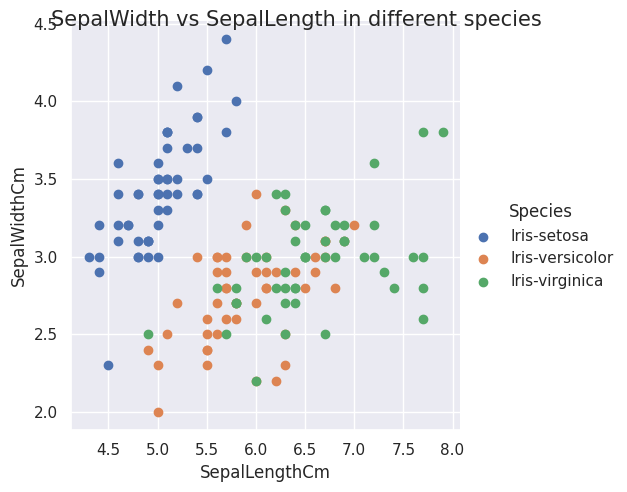

In [ ]:
 # wykres szerokosci od długosci kielicha
g = sns.FacetGrid(iris, hue="Species", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
g.map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

# Set the title
g.fig.suptitle("SepalWidth vs SepalLength in different species", fontsize=15)
plt.show()

##Wykres pudełkowy

Text(0.5, 1.0, 'Petal Length (cm) vs Species')

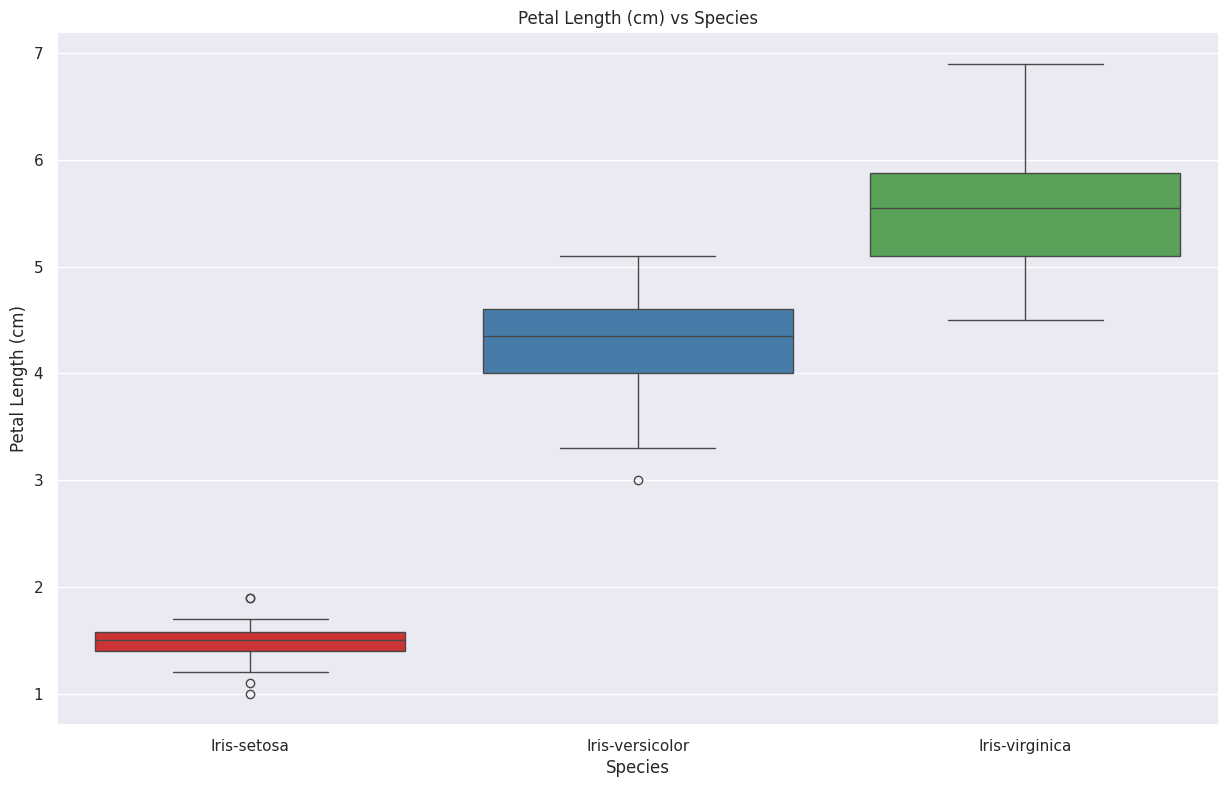

In [ ]:
sns.boxplot(x="Species", y="PetalLengthCm", hue="Species", data=iris, palette="Set1", patch_artist=True, legend="auto")
# Add labels to the axes
plt.xlabel("Species", fontsize=12)
plt.ylabel("Petal Length (cm)", fontsize=12)
plt.title("Petal Length (cm) vs Species")


##Histogram

Text(0.5, 1.0, 'density to petalLength')

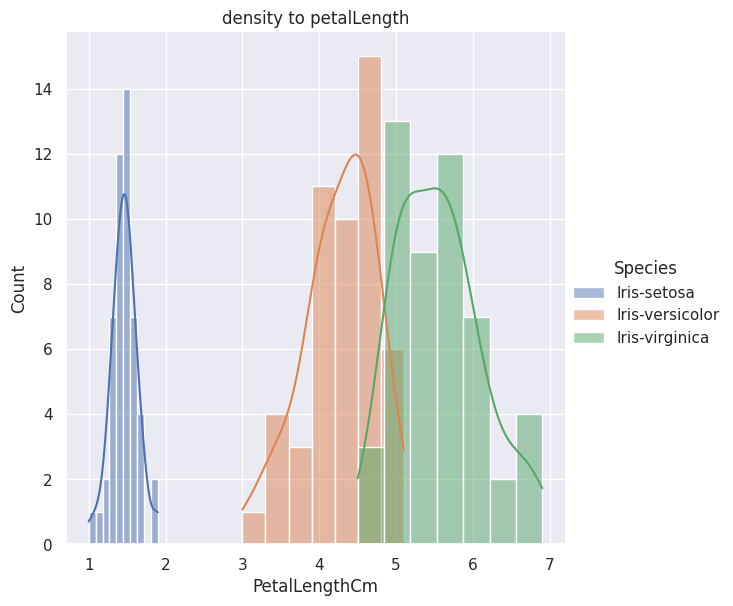

In [ ]:
# histplot - histogram, kde-estymacja gestości
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.histplot, "PetalLengthCm", kde=True) \
   .add_legend()
plt.title("density to petalLength")

# Relation between each pair of features

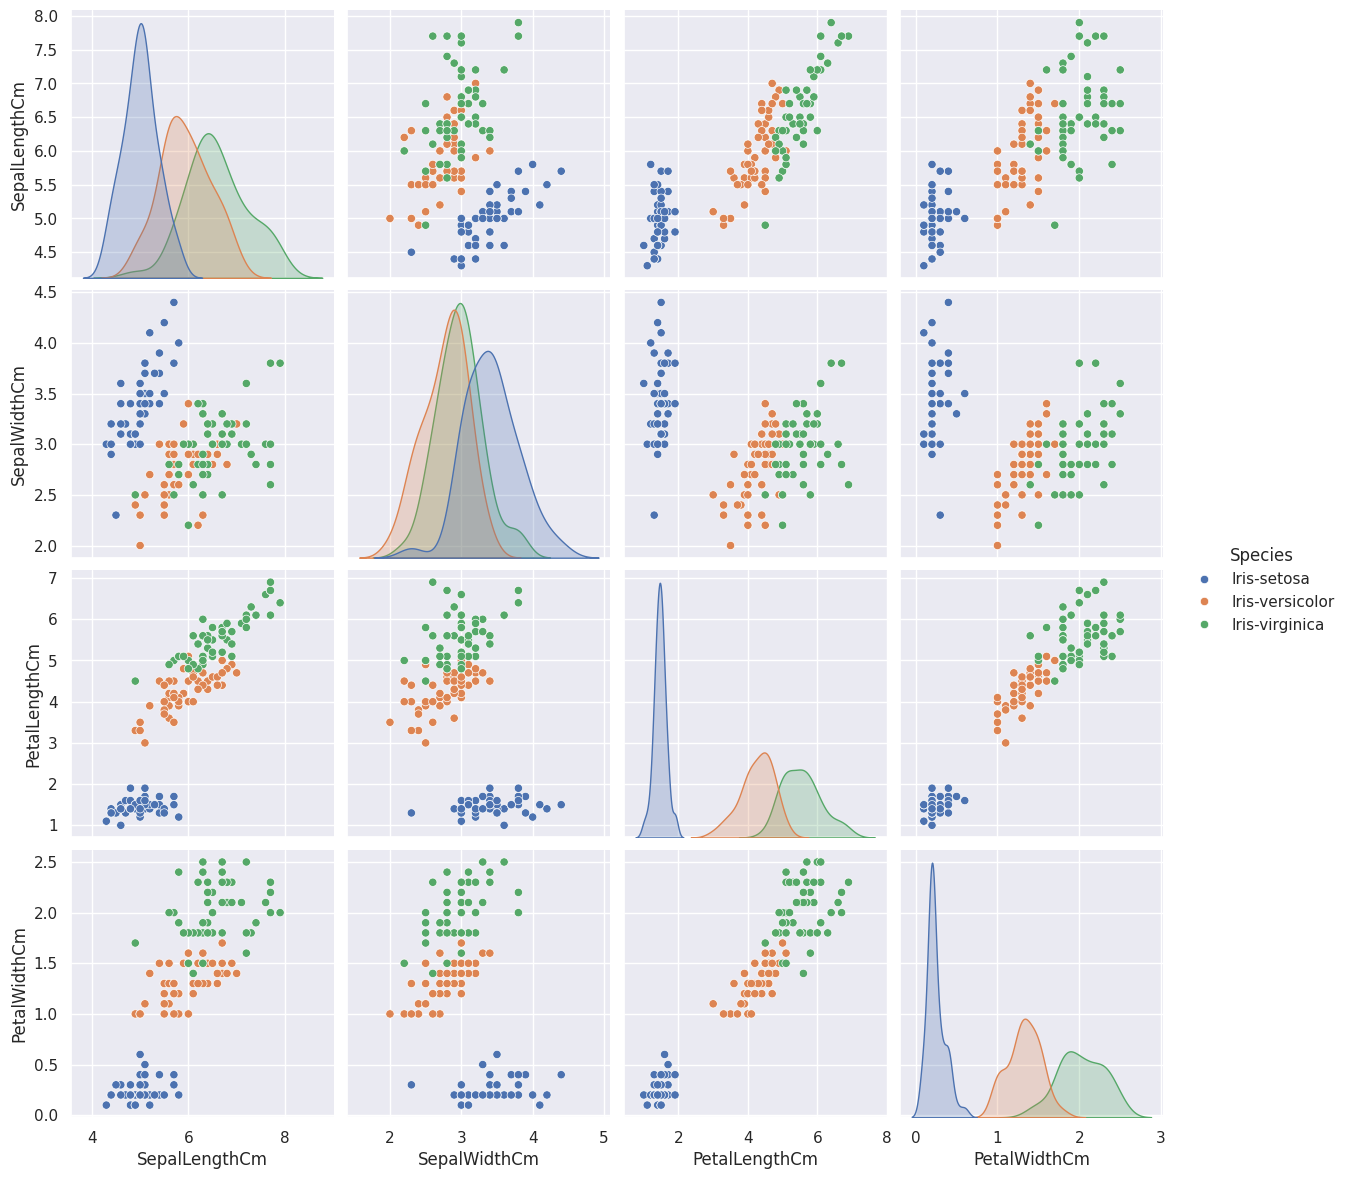

In [ ]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=3)# relation between each pair of features


##Correlaction heatmap(all species)

<Axes: title={'center': 'Correlation Heatmap'}>

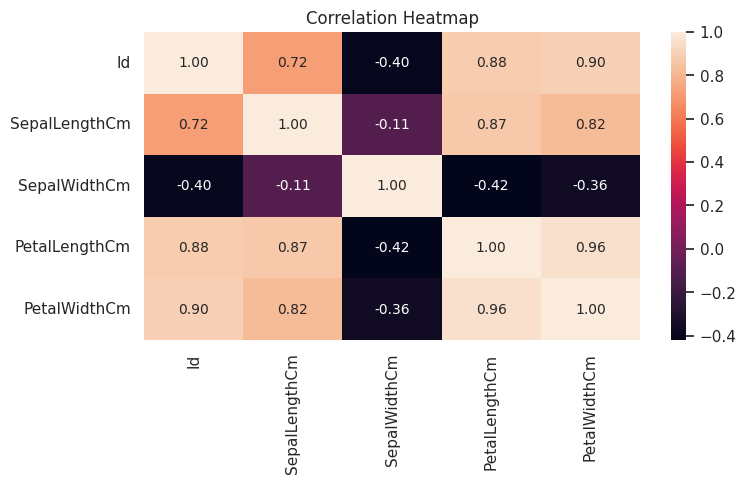

In [ ]:
corr = iris.corr(numeric_only=True).round(2)
sns.set(rc = {"figure.figsize": (8, 4)})
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size": 10})

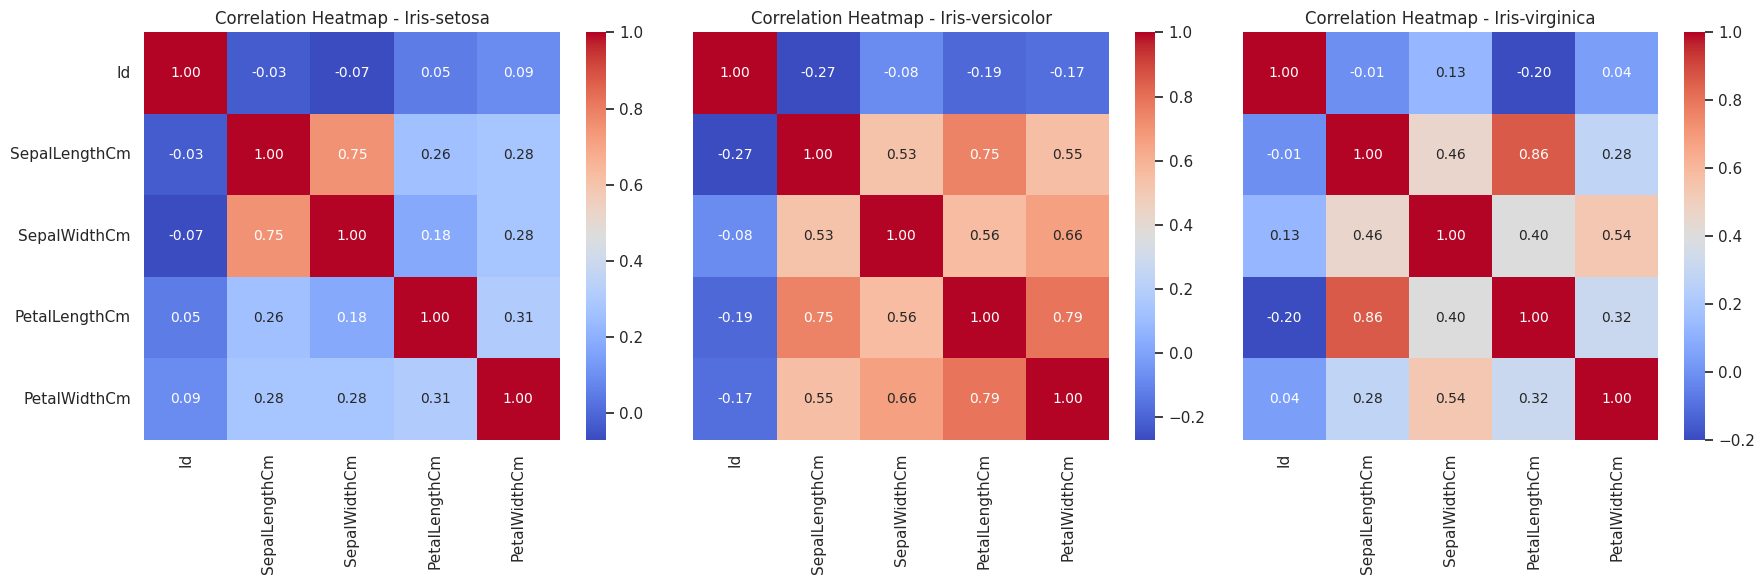

In [ ]:
# Calculate the correlation matrix
corr = iris.corr(numeric_only=True).round(2)

# Set the size of the figure
sns.set(rc={"figure.figsize": (15, 9)})

# Create subplots for each species
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Iterate through each species and create a heatmap
for i, species in enumerate(iris["Species"].unique()):
    species_corr = iris[iris['Species'] == species].corr(numeric_only=True).round(2)
    sns.heatmap(species_corr, annot=True, fmt=".2f", annot_kws={"size": 10}, ax=axes[i], cmap='coolwarm')
    axes[i].set_title(f'Correlation Heatmap - {species}')

# Adjust layout
plt.tight_layout()
plt.show()



---



---
#Wnioski
Różne gatunki (setosa, versicolor i virginica) mają unikalne cechy,
# *Iris-setosa:*
Silna korelacja pomiędzy szerokościa a długoscia kielicha 0.75
Brak innych silnych korelacji
# *Iris-versicolor:*
Silna korelacja pomiedzy długościa kielicha a długoscia płatka 0.75
Silna korelacja pomiedzy długościa a szerokoscia płatka 0.79
Posiada najbardziej skorelowane cechy pośród wszytkich gatunkow
# *Iris-virginica*
Silna korelacja pomiedzy długościa kielicha a dlugoscia płatka 0.86



---



Korelacje Między Długością a Szerokością:
Istnieje dodatnia korelacja, poza gatunkiem iris-setosa między długością płatków a długością działek kielicha(rośliny o większych płatkach mają większe działki kielicha.)

Gatunek Iris-setosa jest wyraźnie oddzielony od pozostałych, jesli chodzi o korelacje cech



---
Wnioski ogólne
  Korelacja pomiedzy petal length (długość płatka) a "petal width" (szerokość płatka) jest bardzo silna 0.96



#2 Zajęcia 11.03.2024:

##biblioteki

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm

from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algorithm
import numpy as np



In [ ]:
'''train, test = train_test_split(iris, test_size = 0.2)#  split into train and test
print(train.shape)
print(test.shape)'''

'train, test = train_test_split(iris, test_size = 0.2)#  split into train and test\nprint(train.shape)\nprint(test.shape)'

In [ ]:
'''train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data'''

"train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features\ntrain_y=train.Species# output of our training data\ntest_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features\ntest_y =test.Species   #output value of test data"

In [ ]:
X = iris.drop(columns=['Id', 'Species'])
y = iris['Species']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

##KNN
Classifies data points based on the majority class of their nearest neighbors. Suitable for linearly separable data sets

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
KNN.fit(train_X,train_y)
prediction=KNN.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))
print('The precison of the KNN is',metrics.precision_score(prediction,test_y, average='weighted'))
print('The recall of the KNN is',metrics.recall_score(prediction,test_y, average='weighted'))
print('The f1 of the KNN is',metrics.f1_score(prediction,test_y, average='weighted'))

print(classification_report(test_y,prediction))#divided to every species

The accuracy of the KNN is 0.9
The precison of the KNN is 0.9023569023569025
The recall of the KNN is 0.9
The f1 of the KNN is 0.8997493734335841
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



**Accuracy**- The number of samples correctly classified out of all the samples present in the test set.

**Precision**- (for the positive class). The number of samples actually belonging to the positive class out of all the samples that were predicted to be of the positive class by the model.

**Recall**- (for the positive class). The number of samples predicted correctly to be belonging to the positive class out of all the samples that actually belong to the positive class.

**F1-Score**- (for the positive class). The harmonic mean of the precision and recall scores obtained for the positive class.

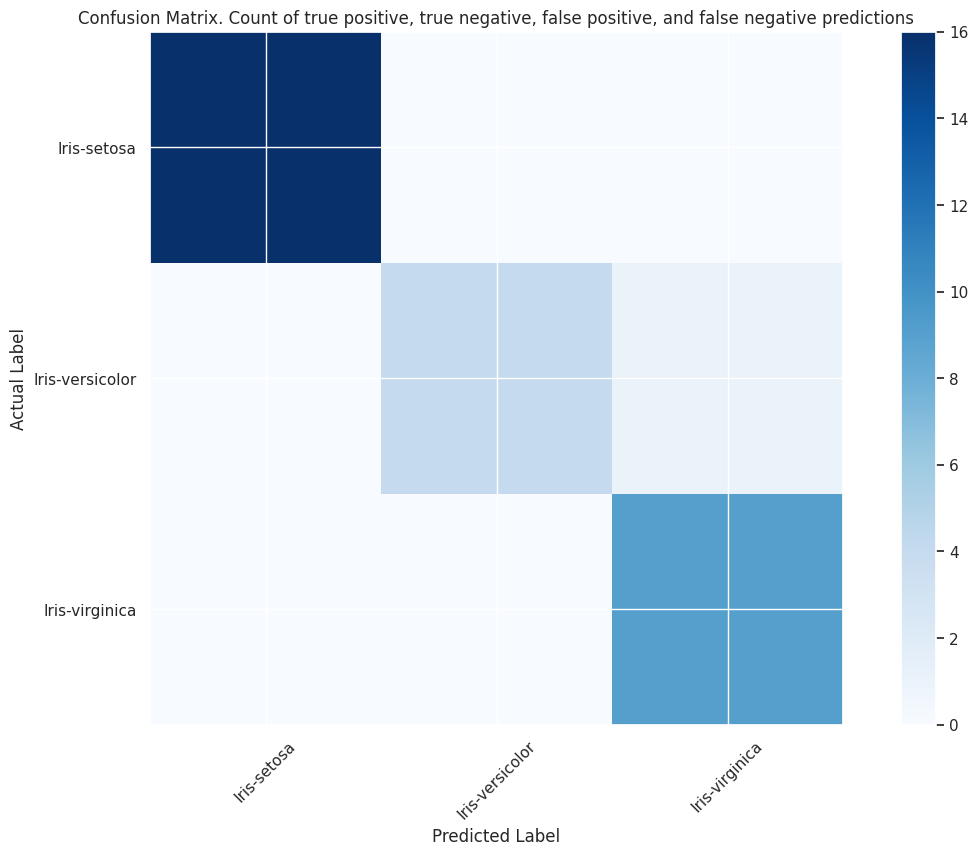

'\nBy definition a confusion matrix C\n is such that C ij\n is equal to the number of observations known to be in group i\n and predicted to be in group j\n\n'

In [ ]:

conf_matrix = confusion_matrix(test_y, prediction)

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix. Count of true positive, true negative, false positive, and false negative predictions')
plt.colorbar()
classes = np.unique(train_y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
#count of true positive, true negative, false positive, and false negative predictions.
'''
By definition a confusion matrix C
 is such that C ij
 is equal to the number of observations known to be in group i
 and predicted to be in group j

'''


##manhattan KNN

In [ ]:
def manhattan_distance(x1, x2):
   return np.sum(np.abs(x1 - x2))

knn_m = KNeighborsClassifier(metric=manhattan_distance)
knn_m.fit(train_X, train_y)
predKNN_M = knn_m.predict(test_X)

print('The accuracy of the KNN is',metrics.accuracy_score(predKNN_M,test_y))
print('The precison of the KNN is',metrics.precision_score(predKNN_M,test_y, average='weighted'))
print('The recall of the KNN is',metrics.recall_score(predKNN_M,test_y, average='weighted'))
print('The f1 of the KNN is',metrics.f1_score(predKNN_M,test_y, average='weighted'))

print(classification_report(test_y,prediction))#divided to every species

The accuracy of the KNN is 0.9666666666666667
The precison of the KNN is 0.9733333333333333
The recall of the KNN is 0.9666666666666667
The f1 of the KNN is 0.9676413255360624
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.80      0.89         5
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.93      0.95        30
   weighted avg       0.97      0.97      0.97        30



#SVM

Support Vector Machine  is used in fields such as image recognition, text classification, and bioinformatics.
Offer robustness(odporność) against overfitting, as they aim to maximize the margin between classes

The accuracy of the SVM is 0.9333333333333333
The precison of the SVM is 0.9333333333333333
The recall of the SVM is 0.9333333333333333
The f1 of the SVM is 0.9333333333333333


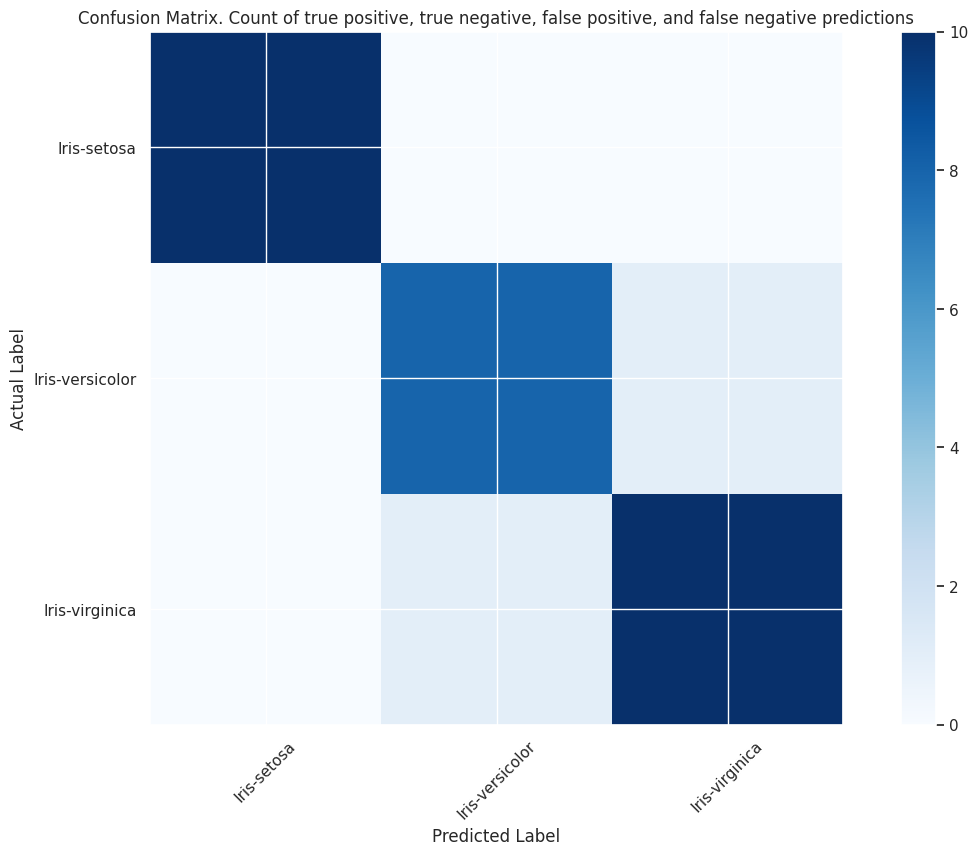

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
svm_classifier = svm.SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(train_X, train_y)
SVMprediction=svm_classifier.predict(test_X)

print('The accuracy of the SVM is',metrics.accuracy_score(SVMprediction,test_y))
print('The precison of the SVM is',metrics.precision_score(SVMprediction,test_y, average='weighted'))
print('The recall of the SVM is',metrics.recall_score(SVMprediction,test_y, average='weighted'))
print('The f1 of the SVM is',metrics.f1_score(SVMprediction,test_y, average='weighted'))

conf_matrix = confusion_matrix(test_y, SVMprediction)

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix. Count of true positive, true negative, false positive, and false negative predictions')
plt.colorbar()
classes = np.unique(train_y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



print(classification_report(test_y,SVMprediction))#divided to every species

##Decision Tree
Recursively partitioning the input space into regions, with each split being chosen to minimize impurity or maximize information gain. One of the main advantages of Decision Trees is their interpretability
However, they are prone to overfitting

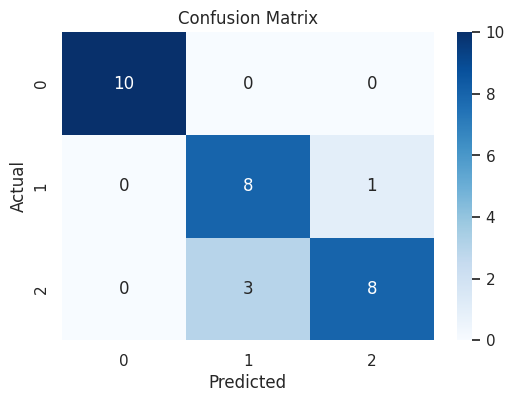

The accuracy of the DT is 0.8666666666666667
The precision of the DT is 0.8774410774410775
The recall of the DT is 0.8666666666666667
The f1 of the DT is 0.8666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.73      0.89      0.80         9
 Iris-virginica       0.89      0.73      0.80        11

       accuracy                           0.87        30
      macro avg       0.87      0.87      0.87        30
   weighted avg       0.88      0.87      0.87        30

Feature importances:
PetalLengthCm: 0.9689857867675922
SepalWidthCm: 0.031014213232407918
SepalLengthCm: 0.0
Id: 0.0


In [ ]:
X = iris.drop(columns=['Id', 'Species'])
y = iris['Species']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=8)

DTC =DecisionTreeClassifier()
DTC.fit(train_X, train_y)
DTCprediction=DTC.predict(test_X)

cm = confusion_matrix(test_y, DTCprediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print('The accuracy of the DT is',metrics.accuracy_score(test_y,DTCprediction))
precision = metrics.precision_score(test_y, DTCprediction, average='weighted')
recall = metrics.recall_score(test_y, DTCprediction, average='weighted')
f1 = metrics.f1_score(test_y, DTCprediction, average='weighted')
print('The precision of the DT is', precision)
print('The recall of the DT is', recall)
print('The f1 of the DT is', f1)

print(classification_report(test_y, DTCprediction))#divided to every species

#importances of feature
feature_importances = DTC.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = iris.columns
print("Feature importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")


###Optymalizacja DT

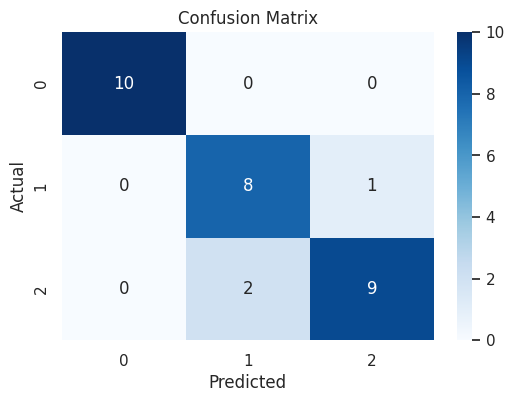

The accuracy of the DT is 0.9
The precision of the DT is 0.9033333333333334
The recall of the DT is 0.9
The f1 of the DT is 0.9002506265664162
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

Feature importances:
PetalLengthCm: 0.9523156471551728
SepalWidthCm: 0.031014213232407915
Id: 0.01667013961241925
SepalLengthCm: 0.0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree Classifier
DTC = DecisionTreeClassifier()

# Define the parameters you want to optimize
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(DTC, param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_X, train_y)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the model with the best parameters
best_estimator.fit(train_X, train_y)

# Make predictions
DTCpredictionBest = best_estimator.predict(test_X)


cm = confusion_matrix(test_y, DTCpredictionBest)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('The accuracy of the DT is', metrics.accuracy_score(test_y, DTCpredictionBest))
print('The precision of the DT is', metrics.precision_score(test_y, DTCpredictionBest, average='weighted'))
print('The recall of the DT is', metrics.recall_score(test_y, DTCpredictionBest, average='weighted'))
print('The f1 of the DT is', metrics.f1_score(test_y, DTCpredictionBest, average='weighted'))

print(classification_report(test_y,DTCpredictionBest)) #divided to every species

feature_importances = best_estimator.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = iris.columns
print("Feature importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")


#Wnioski


Wykres prezentujacy z jaka skutecznościa działają algorytmy SVM, KNN i DT

In [ ]:
import plotly.graph_objects as go
model_names = ['SVM', 'KNN', 'Decision Tree']
accuracies = [metrics.accuracy_score(SVMprediction,test_y), metrics.accuracy_score(prediction,test_y), metrics.accuracy_score(DTCprediction,test_y)]

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=model_names, y=accuracies, marker_color='skyblue')])
fig.update_layout(
                  title='Model Accuracies',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  yaxis=dict(tickformat=".2%"))
fig.show()

##Wnioski ogólne
Model SVM osiągnął najwyższą dokładność **0.96**, precyzję, czułość i wynik F1 spośród wszystkich trzech modeli.

Model KNN uzyskał niższą dokładność **0.90**, precyzję, czułość i wynik F1 w porównaniu do modelu SVM, ale był efektywniejszy niż drzewo decyzyjne.
Po optymalizacji (manhattan) uzyskał dokładnośc **0.96**

Drzewo decyzyjne uzyskało najniższe wyniki wskaźników wydajności. Po optymalizacji było to** 0.9**

##Analiza istotności cech
Cecha "petal length" (długość płatka) jest najistotniejsza dla klasyfikacji zbioru Iris. Istotna jest rownież "petal width" (szerokość płatka). Te dwie cechy mają największy wpływ na klasyfikację gatunków irysów.
Możemy również wnioskować, że modele KNN i SVM, mimo braku dostępnej bezpośredniej miary istotności cech, mogłyby korzystać z tych samych istotnych cech dla klasyfikacji

W celu  poprawy wydajności modeli można przeprowadzić optymalizację hiperparametrów, takich jak C  w przypadku SVM lub liczba sąsiadów w przypadku KNN